In [934]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import binarize
from sklearn.preprocessing import Binarizer
import matplotlib.pyplot as plt

from datetime import datetime

In [935]:
# 한글깨짐방지코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

# 그래프 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

# 통계 라이브러리 임포트
import scipy.stats as stats

In [936]:
df=pd.read_excel('result_data.xlsx', skiprows=1)
df

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.000000,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0
...,...,...,...,...,...,...,...,...
38304,2020-01-01 00:20:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38305,2020-01-01 00:40:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38306,2020-01-01 01:00:00,20.000000,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,0,NaN
38307,2020-01-01 01:20:00,20.000000,100490,201478,더케이 예다함 상조서비스(티포트),무형,0,NaN


In [937]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38309 entries, 0 to 38308
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    38309 non-null  datetime64[ns]
 1   노출(분)   21525 non-null  float64       
 2   마더코드    38309 non-null  int64         
 3   상품코드    38309 non-null  int64         
 4   상품명     38309 non-null  object        
 5   상품군     38309 non-null  object        
 6   판매단가    38309 non-null  int64         
 7   취급액     35379 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.3+ MB


In [938]:
#1. 무형, 보험 상품 및 판매가 0인 프로그램은 제외
df=df[df['상품군']!='무형']

In [939]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 38303
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    37372 non-null  datetime64[ns]
 1   노출(분)   20588 non-null  float64       
 2   마더코드    37372 non-null  int64         
 3   상품코드    37372 non-null  int64         
 4   상품명     37372 non-null  object        
 5   상품군     37372 non-null  object        
 6   판매단가    37372 non-null  int64         
 7   취급액     35379 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.6+ MB


,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0
1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0
3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0


In [940]:
# 2. 취급액이 NaN 인경우 0으로 채워주기: 팔리지 않음
#    노출분이 NaN 인경우 ffill로 채워주기: 동일 상품 동일 노출(분)
df['노출(분)'].fillna(method='ffill', inplace=True)

In [941]:
df.fillna(0, inplace=True) #취급액이 NaN 인경우 0으로 채워주기: 팔리지 않음 (NaN인 열은 취급액 열 밖에 없으르모 한번에 채움)

In [942]:
df.info() #모든 결측값 제거 완료

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37372 entries, 0 to 38303
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    37372 non-null  datetime64[ns]
 1   노출(분)   37372 non-null  float64       
 2   마더코드    37372 non-null  int64         
 3   상품코드    37372 non-null  int64         
 4   상품명     37372 non-null  object        
 5   상품군     37372 non-null  object        
 6   판매단가    37372 non-null  int64         
 7   취급액     37372 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.6+ MB


In [943]:
# 3. 주문량 = 취급액/판매단가(열 생성 하기)
df['주문량']=df['취급액']/df['판매단가']

In [944]:
df.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,52.606516
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,109.548872
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,81.754386
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.310777
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.218045


In [945]:
# 4. 심야 2:00 ~ 6:20 시간대 제외
#    요일 열 새로 생성 0~6 월~일요일, 중 토요일 (18:00~18:20 제외)

df['요일']=df['방송일시'].dt.dayofweek

In [946]:
df.index = df['방송일시']

In [947]:
df[df['요일']==5].between_time('17:00', '18:21') #토요일 18:00~18:20 은 이미 포함되지 않은 상태를 확인

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량,요일
방송일시,,,,,,,,,,
2019-01-05 17:00:00,2019-01-05 17:00:00,20.0,100435,201350,우리바다 손질왕꼬막 24팩,농수축,39900,52050000.0,1304.511278,5
2019-01-05 17:20:00,2019-01-05 17:20:00,20.0,100435,201350,우리바다 손질왕꼬막 24팩,농수축,39900,77249000.0,1936.065163,5
2019-01-05 17:40:00,2019-01-05 17:40:00,20.0,100435,201350,우리바다 손질왕꼬막 24팩,농수축,39900,104552000.0,2620.350877,5
2019-01-05 18:20:00,2019-01-05 18:20:00,20.0,100801,202365,바다먹자 국내산 손질꽃게 7팩,농수축,59900,26816000.0,447.679466,5
2019-01-12 17:00:00,2019-01-12 17:00:00,20.0,100491,201483,피시원 국내산 손질 대구 8팩 * 매운탕 양념 8팩,농수축,59900,22580000.0,376.961603,5
...,...,...,...,...,...,...,...,...,...,...
2019-12-21 17:20:00,2019-12-21 17:20:00,20.0,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900,32891000.0,824.335840,5
2019-12-21 17:40:00,2019-12-21 17:40:00,20.0,100418,201322,코몽트 덤블 플리스 자켓 2종,의류,39900,223492000.0,5601.303258,5
2019-12-28 17:00:00,2019-12-28 17:00:00,20.0,100202,201018,임성근의 녹용도가니탕 풀세트,농수축,55900,56234000.0,1005.974955,5


In [948]:
# 심야 2:00 ~ 6:20 시간대 제외
df.between_time('2:00','6:19')

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량,요일
방송일시,,,,,,,,,,
2019-01-01 06:00:00,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,52.606516,1
2019-01-01 06:00:00,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,109.548872,1
2019-01-02 06:00:00,2019-01-02 06:00:00,20.0,100229,200800,벨라홈 논슬립 옷걸이 세트,생활용품,29800,9605000.0,322.315436,2
2019-01-03 06:00:00,2019-01-03 06:00:00,20.0,100781,202292,에펨 여성 미들퍼부츠,잡화,39800,2450000.0,61.557789,3
2019-01-03 06:00:00,2019-01-03 06:00:00,20.0,100781,202285,에펨 남성 미들퍼부츠,잡화,49800,2645000.0,53.112450,3
...,...,...,...,...,...,...,...,...,...,...
2019-12-26 02:00:00,2019-12-26 02:00:00,20.0,100624,201927,안국루테인 미니100(5박스),건강기능,59000,18822000.0,319.016949,3
2019-12-27 02:00:00,2019-12-27 02:00:00,20.0,100312,201006,블랙모어스 알티지 오메가3 3병 (53주분),건강기능,95200,16867000.0,177.174370,4
2019-12-28 02:00:00,2019-12-28 02:00:00,20.0,100841,202484,옛날 그 쥐포 110장 (11팩),농수축,32900,33231000.0,1010.060790,5


In [949]:
df=df.drop(df.between_time('2:00','6:19').index)
df['일시'] = df['방송일시']
df
# 상품군으로 groupby 해서 볼까

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량,요일,일시
방송일시,,,,,,,,,,,
2019-01-01 06:20:00,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,81.754386,1,2019-01-01 06:20:00
2019-01-01 06:20:00,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,174.310777,1,2019-01-01 06:20:00
2019-01-01 06:40:00,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,167.218045,1,2019-01-01 06:40:00
2019-01-01 06:40:00,2019-01-01 06:40:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,9337000.0,234.010025,1,2019-01-01 06:40:00
2019-01-01 07:00:00,2019-01-01 07:00:00,20.0,100305,200974,오모떼 레이스 파운데이션 브라,속옷,59000,6819000.0,115.576271,1,2019-01-01 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:40:00,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,주방,148000,10157000.0,68.628378,1,2019-12-31 23:40:00
2020-01-01 00:00:00,2020-01-01 00:00:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,주방,178000,50929000.0,286.117978,2,2020-01-01 00:00:00
2020-01-01 00:00:00,2020-01-01 00:00:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,주방,168000,104392000.0,621.380952,2,2020-01-01 00:00:00


In [950]:
df.to_csv('result4Analysis.csv', index=False)

In [951]:
# groupby 상품군으로 분석해보기

In [952]:
#### 날씨 데이터 추가염 ㅎ_ㅎ ####
weather = pd.read_csv("weather_data.csv",encoding='CP949')
weather

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),적설(cm),지면상태(지면상태코드)
0,108,서울,2019-01-01 6:00,-7.9,NaN,1.3,290.0,60.0,NaN,NaN
1,108,서울,2019-01-01 7:00,-7.7,NaN,1.3,320.0,58.0,NaN,NaN
2,108,서울,2019-01-01 8:00,-7.7,NaN,0.9,360.0,57.0,NaN,NaN
3,108,서울,2019-01-01 9:00,-7.0,NaN,0.9,290.0,50.0,NaN,NaN
4,108,서울,2019-01-01 10:00,-4.9,NaN,1.6,290.0,44.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8750,108,서울,2019-12-31 20:00,-7.0,NaN,2.9,290.0,41.0,NaN,NaN
8751,108,서울,2019-12-31 21:00,-7.4,NaN,0.8,20.0,43.0,NaN,NaN
8752,108,서울,2019-12-31 22:00,-8.2,NaN,0.0,0.0,42.0,NaN,NaN
8753,108,서울,2019-12-31 23:00,-7.4,NaN,0.0,0.0,45.0,NaN,NaN


In [953]:
# 타입: object -> datetime 변경
weather['일시'] = pd.to_datetime(weather['일시'])
weather['일시']

0      2019-01-01 06:00:00
1      2019-01-01 07:00:00
2      2019-01-01 08:00:00
3      2019-01-01 09:00:00
4      2019-01-01 10:00:00
               ...        
8750   2019-12-31 20:00:00
8751   2019-12-31 21:00:00
8752   2019-12-31 22:00:00
8753   2019-12-31 23:00:00
8754   2020-01-01 00:00:00
Name: 일시, Length: 8755, dtype: datetime64[ns]

In [954]:
# 필요 없는 컬럼 제거
weather = weather.drop('지점',axis = 1)
weather = weather.drop('지점명',axis = 1)
weather = weather.drop('지면상태(지면상태코드)',axis = 1)

In [955]:
# nan을 0으로 변경 (목적: 추후 merge 후 nan으로 있으면 안되니까)
weather = weather.replace(np.nan, '0')

In [956]:
# df와 weather merge / 일시를 기준으로 / outer로 하여 합집합 개념으로 진행.
df_new = pd.merge(df,weather, on='일시', how='outer')

In [957]:
# 아래에서 위로 채우기 bfill -> nan 데이터 제거 dropna -> '일시' 컬럼 제거
df_new = df_new.fillna(method = 'bfill')
df_new = df_new.dropna()
df_new = df_new.drop('일시',axis = 1)

In [958]:
# df와 df_new의 shape이 같음을 확인.
print(df.shape)
print(df_new.head())


(36899, 11)
                 방송일시  노출(분)      마더코드      상품코드               상품명 상품군  \
0 2019-01-01 06:20:00   20.0  100346.0  201072.0     테이트 남성 셀린니트3종  의류   
1 2019-01-01 06:20:00   20.0  100346.0  201079.0     테이트 여성 셀린니트3종  의류   
2 2019-01-01 06:40:00   20.0  100346.0  201072.0     테이트 남성 셀린니트3종  의류   
3 2019-01-01 06:40:00   20.0  100346.0  201079.0     테이트 여성 셀린니트3종  의류   
4 2019-01-01 07:00:00   20.0  100305.0  200974.0  오모떼 레이스 파운데이션 브라  속옷   

      판매단가        취급액         주문량   요일  기온(°C) 강수량(mm) 풍속(m/s) 풍향(16방위)  \
0  39900.0  3262000.0   81.754386  1.0    -7.7       0     1.3      320   
1  39900.0  6955000.0  174.310777  1.0    -7.7       0     1.3      320   
2  39900.0  6672000.0  167.218045  1.0    -7.7       0     1.3      320   
3  39900.0  9337000.0  234.010025  1.0    -7.7       0     1.3      320   
4  59000.0  6819000.0  115.576271  1.0    -7.7       0     1.3      320   

   습도(%) 적설(cm)  
0   58.0      0  
1   58.0      0  
2   58.0      0  
3   58.0      0  
4 

In [959]:
df_new['요일'] = df_new['요일'].astype('category')

In [960]:
df_new['강수량(mm)'] = df_new['강수량(mm)'].astype(float)

In [961]:
df_new.corr()

,노출(분),마더코드,상품코드,판매단가,취급액,주문량,기온(°C),강수량(mm),습도(%)
노출(분),1.000000,0.094999,0.086022,0.147808,0.026321,-0.064054,0.027973,-0.002241,0.000133
마더코드,0.094999,1.000000,0.978881,-0.214975,-0.028782,0.012116,-0.095006,-0.002528,-0.036513
상품코드,0.086022,0.978881,1.000000,-0.227482,-0.015380,0.023031,-0.113018,-0.004666,-0.041606
판매단가,0.147808,-0.214975,-0.227482,1.000000,-0.253608,-0.383704,0.010468,-0.004471,0.056550
취급액,0.026321,-0.028782,-0.015380,-0.253608,1.000000,0.769884,-0.003342,0.008486,-0.064444
주문량,-0.064054,0.012116,0.023031,-0.383704,0.769884,1.000000,0.037455,0.010555,-0.072253
기온(°C),0.027973,-0.095006,-0.113018,0.010468,-0.003342,0.037455,1.000000,0.059637,0.161593
강수량(mm),-0.002241,-0.002528,-0.004666,-0.004471,0.008486,0.010555,0.059637,1.000000,0.237977
습도(%),0.000133,-0.036513,-0.041606,0.056550,-0.064444,-0.072253,0.161593,0.237977,1.000000


In [962]:
# fig=sns.jointplot(df_new['취급액'],df_new['기온(°C)'], kind='kde')
# fig.annotate(stats.pearsonr)
# 상관관계 너무 구림.
# p -> 0.05가 나와야 의미있음 -> 100번 중 95번이 같은 경과 나옴

In [963]:
from datetime import date, datetime
 
MON, TUE, WED, THU, FRI, SAT, SUN = range(7)
 
class holiday2019():
    HOLIDAYS = ((1,1), # new Year
                (2,4), # new Year0
                (2,5), # new Year1
                (2,6), # new Year2
                (3,1), # 3.1
                (5,5), # Children's Day
                (5,6), # Make up Holiday
                (5,12), # Buddha Day
                (6,6), # Memorial Day
                (8,15), # Liberation Day
                (9,12), # Thanksgiving0
                (9,13), # Thanksgiving1
                (9,14), # Thanksgiving2
                (10,3), # National Foundation Day
                (10,9), # Hangul Day
                (12,25) # Christmas
                )
    def is_holiday(self, daytuple):
        HOLIDAYS = self.HOLIDAYS
        if daytuple in HOLIDAYS:
            return True
        else:
            return False
    

In [964]:
l = []
if __name__=='__main__':
    for i in df_new['방송일시']:
        now = i
        daytuple = ((now.month),(now.day))
        nowholiday = holiday2019()
        l.append(nowholiday.is_holiday(daytuple))

In [965]:
holiday = pd.Series(l).astype('category')
df_new['휴일'] = holiday

In [966]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36899 entries, 0 to 36898
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   방송일시      36899 non-null  datetime64[ns]
 1   노출(분)     36899 non-null  float64       
 2   마더코드      36899 non-null  float64       
 3   상품코드      36899 non-null  float64       
 4   상품명       36899 non-null  object        
 5   상품군       36899 non-null  object        
 6   판매단가      36899 non-null  float64       
 7   취급액       36899 non-null  float64       
 8   주문량       36899 non-null  float64       
 9   요일        36899 non-null  category      
 10  기온(°C)    36899 non-null  float64       
 11  강수량(mm)   36899 non-null  float64       
 12  풍속(m/s)   36899 non-null  object        
 13  풍향(16방위)  36899 non-null  object        
 14  습도(%)     36899 non-null  float64       
 15  적설(cm)    36899 non-null  object        
 16  휴일        36899 non-null  category      
dtypes: category(

In [967]:
list2 = []
for i in df_new['방송일시']:
    list2.append(i.weekday())
weekday = pd.Series(list2)

In [968]:
df_new['요일'] = weekday

In [969]:
df_new['요일'] = df_new['요일'].astype('category')

In [970]:
df_new.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량,요일,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),적설(cm),휴일
0,2019-01-01 06:20:00,20.0,100346.0,201072.0,테이트 남성 셀린니트3종,의류,39900.0,3262000.0,81.754386,1,-7.7,0.0,1.3,320,58.0,0,True
1,2019-01-01 06:20:00,20.0,100346.0,201079.0,테이트 여성 셀린니트3종,의류,39900.0,6955000.0,174.310777,1,-7.7,0.0,1.3,320,58.0,0,True
2,2019-01-01 06:40:00,20.0,100346.0,201072.0,테이트 남성 셀린니트3종,의류,39900.0,6672000.0,167.218045,1,-7.7,0.0,1.3,320,58.0,0,True
3,2019-01-01 06:40:00,20.0,100346.0,201079.0,테이트 여성 셀린니트3종,의류,39900.0,9337000.0,234.010025,1,-7.7,0.0,1.3,320,58.0,0,True
4,2019-01-01 07:00:00,20.0,100305.0,200974.0,오모떼 레이스 파운데이션 브라,속옷,59000.0,6819000.0,115.576271,1,-7.7,0.0,1.3,320,58.0,0,True


In [971]:
df_new.loc[df_new['휴일'] == 1, 'resting_day'] = True
df_new.loc[df_new['휴일'] == 0, 'working_day'] = True

df_new['working_day'].fillna(False, inplace = True)
df_new['resting_day'].fillna(False, inplace = True)

In [972]:
df_new.loc[df_new['요일'] == 0, '월'] = True
df_new.loc[df_new['요일'] == 1, '화'] = True
df_new.loc[df_new['요일'] == 2, '수'] = True
df_new.loc[df_new['요일'] == 3, '목'] = True
df_new.loc[df_new['요일'] == 4, '금'] = True
df_new.loc[df_new['요일'] == 5, '토'] = True
df_new.loc[df_new['요일'] == 6, '일'] = True

df_new['월'].fillna(False, inplace = True)
df_new['화'].fillna(False, inplace = True)
df_new['수'].fillna(False, inplace = True)
df_new['목'].fillna(False, inplace = True)
df_new['금'].fillna(False, inplace = True)
df_new['토'].fillna(False, inplace = True)
df_new['일'].fillna(False, inplace = True)

In [973]:
df_new['month'] = df_new['방송일시'].dt.month
df_new['day'] = df_new['방송일시'].dt.day
df_new['hour'] = df_new['방송일시'].dt.hour

In [974]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36899 entries, 0 to 36898
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   방송일시         36899 non-null  datetime64[ns]
 1   노출(분)        36899 non-null  float64       
 2   마더코드         36899 non-null  float64       
 3   상품코드         36899 non-null  float64       
 4   상품명          36899 non-null  object        
 5   상품군          36899 non-null  object        
 6   판매단가         36899 non-null  float64       
 7   취급액          36899 non-null  float64       
 8   주문량          36899 non-null  float64       
 9   요일           36899 non-null  category      
 10  기온(°C)       36899 non-null  float64       
 11  강수량(mm)      36899 non-null  float64       
 12  풍속(m/s)      36899 non-null  object        
 13  풍향(16방위)     36899 non-null  object        
 14  습도(%)        36899 non-null  float64       
 15  적설(cm)       36899 non-null  object        
 16  휴일  

In [975]:
df_new.columns

Index(['방송일시', '노출(분)', '마더코드', '상품코드', '상품명', '상품군', '판매단가', '취급액', '주문량',
       '요일', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '적설(cm)',
       '휴일', 'resting_day', 'working_day', '월', '화', '수', '목', '금', '토', '일',
       'month', 'day', 'hour'],
      dtype='object')

In [976]:
df_new['마더코드'] = df_new['마더코드'].astype('category')
df_new['상품코드'] = df_new['상품코드'].astype('category')

In [977]:
prod_cate = list(np.array(df_new['상품군'].tolist()))
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(prod_cate)
labels = le.transform(prod_cate)
labels

array([6, 6, 6, ..., 9, 9, 9], dtype=int64)

In [978]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
labels = labels.reshape(-1,1)
ohe.fit(labels)
oh_labels = ohe.transform(labels)
df = pd.DataFrame(prod_cate,columns=['items'])
df_ohe = pd.get_dummies(df)
df_ohe['방송일시'] = df_new['방송일시']
df_ohe

,items_가구,items_가전,items_건강기능,items_농수축,items_생활용품,items_속옷,items_의류,items_이미용,items_잡화,items_주방,items_침구,방송일시
0,0,0,0,0,0,0,1,0,0,0,0,2019-01-01 06:20:00
1,0,0,0,0,0,0,1,0,0,0,0,2019-01-01 06:20:00
2,0,0,0,0,0,0,1,0,0,0,0,2019-01-01 06:40:00
3,0,0,0,0,0,0,1,0,0,0,0,2019-01-01 06:40:00
4,0,0,0,0,0,1,0,0,0,0,0,2019-01-01 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
36894,0,0,0,0,0,0,0,0,0,1,0,2019-12-31 23:40:00
36895,0,0,0,0,0,0,0,0,0,1,0,2020-01-01 00:00:00
36896,0,0,0,0,0,0,0,0,0,1,0,2020-01-01 00:00:00
36897,0,0,0,0,0,0,0,0,0,1,0,2020-01-01 00:00:00


In [979]:
df_new = pd.merge(df_new,df_ohe, on='방송일시',)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109443 entries, 0 to 109442
Data columns (total 40 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   방송일시         109443 non-null  datetime64[ns]
 1   노출(분)        109443 non-null  float64       
 2   마더코드         109443 non-null  category      
 3   상품코드         109443 non-null  category      
 4   상품명          109443 non-null  object        
 5   상품군          109443 non-null  object        
 6   판매단가         109443 non-null  float64       
 7   취급액          109443 non-null  float64       
 8   주문량          109443 non-null  float64       
 9   요일           109443 non-null  category      
 10  기온(°C)       109443 non-null  float64       
 11  강수량(mm)      109443 non-null  float64       
 12  풍속(m/s)      109443 non-null  object        
 13  풍향(16방위)     109443 non-null  object        
 14  습도(%)        109443 non-null  float64       
 15  적설(cm)       109443 non-null  obje

In [980]:
col = ['방송일시','노출(분)','마더코드', '상품코드', '상품명', '상품군', '판매단가','취급액','주문량','월','화','수','목','금','토','일','요일','month','day','hour','휴일', 'resting_day', 'working_day',\
        'items_가구', 'items_가전', 'items_건강기능', 'items_농수축',
       'items_생활용품', 'items_속옷', 'items_의류', 'items_이미용', 'items_잡화',
       'items_주방', 'items_침구']
df_zip = df_new[col]
len(col)

34

In [981]:
df_zip

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,주문량,월,...,items_가전,items_건강기능,items_농수축,items_생활용품,items_속옷,items_의류,items_이미용,items_잡화,items_주방,items_침구
0,2019-01-01 06:20:00,20.0,100346.0,201072.0,테이트 남성 셀린니트3종,의류,39900.0,3262000.0,81.754386,False,...,0,0,0,0,0,1,0,0,0,0
1,2019-01-01 06:20:00,20.0,100346.0,201072.0,테이트 남성 셀린니트3종,의류,39900.0,3262000.0,81.754386,False,...,0,0,0,0,0,1,0,0,0,0
2,2019-01-01 06:20:00,20.0,100346.0,201079.0,테이트 여성 셀린니트3종,의류,39900.0,6955000.0,174.310777,False,...,0,0,0,0,0,1,0,0,0,0
3,2019-01-01 06:20:00,20.0,100346.0,201079.0,테이트 여성 셀린니트3종,의류,39900.0,6955000.0,174.310777,False,...,0,0,0,0,0,1,0,0,0,0
4,2019-01-01 06:40:00,20.0,100346.0,201072.0,테이트 남성 셀린니트3종,의류,39900.0,6672000.0,167.218045,False,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109438,2020-01-01 00:00:00,20.0,100448.0,201384.0,무이자쿠첸압력밥솥 6인용,주방,158000.0,13765000.0,87.120253,False,...,0,0,0,0,0,0,0,0,1,0
109439,2020-01-01 00:00:00,20.0,100448.0,201391.0,일시불쿠첸압력밥솥 6인용,주방,148000.0,46608000.0,314.918919,False,...,0,0,0,0,0,0,0,0,1,0
109440,2020-01-01 00:00:00,20.0,100448.0,201391.0,일시불쿠첸압력밥솥 6인용,주방,148000.0,46608000.0,314.918919,False,...,0,0,0,0,0,0,0,0,1,0
109441,2020-01-01 00:00:00,20.0,100448.0,201391.0,일시불쿠첸압력밥솥 6인용,주방,148000.0,46608000.0,314.918919,False,...,0,0,0,0,0,0,0,0,1,0


In [982]:
df_zip_corr = df_zip.corr()
mask = np.array(df_zip_corr)
mask[np.tril_indices_from(mask)] = False
df_zip_corr = df_zip_corr[abs(df_zip_corr) > 0.01]

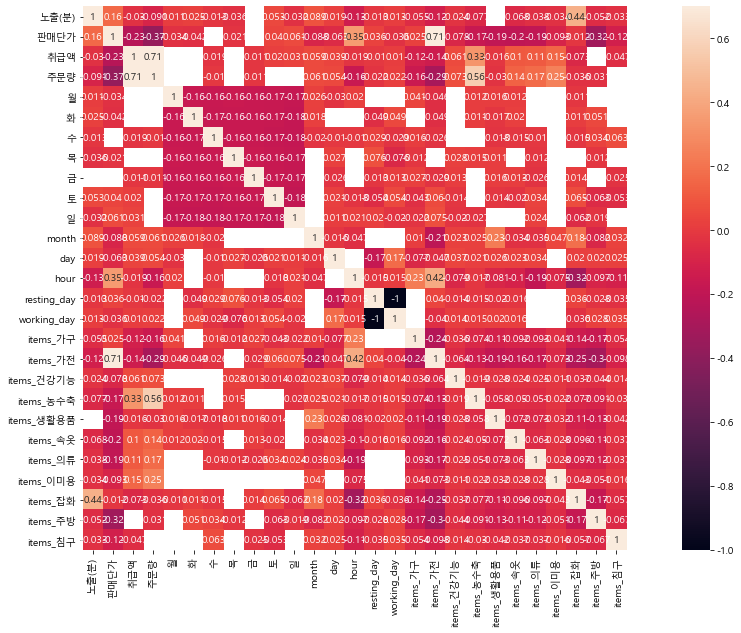

In [983]:
plt.figure(figsize = (20,10))
heat = sns.heatmap(df_zip_corr,square = True, annot = True, vmax = 0.7)

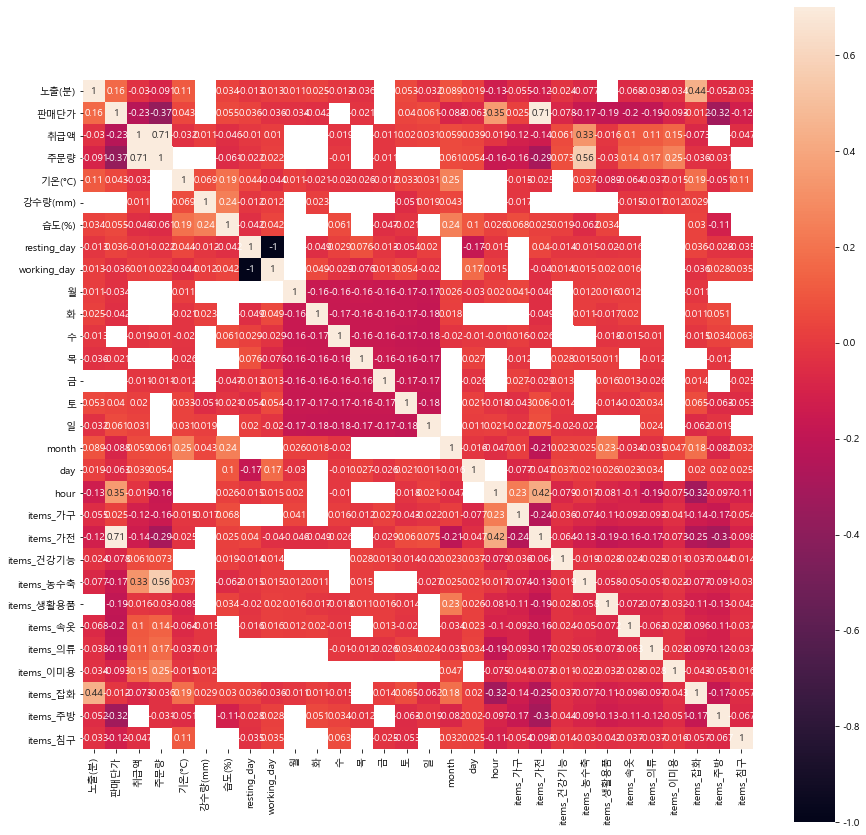

In [984]:
df_new_corr = df_new.corr()
df_new_corr = df_new_corr[abs(df_new_corr) > 0.01]
mask = np.array(df_new_corr)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize = (15,15))
heat = sns.heatmap(df_new_corr,square = True, annot = True, vmax = 0.7)

In [985]:
# fig, (ax1, ax2) = plt.subplots(ncols = 2)
# fig.set_size_inches(20,5)
# fig, ax3 = plt.subplots()
# fig.set_size_inches(20,5)
# fig, ax4 = plt.subplots()
# fig.set_size_inches(20,5)
# fig, ax5 = plt.subplots()
# fig.set_size_inches(20,5)
# sns.barplot(data = df_new, x = '휴일',y = '취급액',ax=ax1)
# sns.barplot(data = df_new, x = '요일',y = '취급액',ax=ax2)
# sns.barplot(data = df_new, x = '기온(°C)',y = '취급액',ax=ax3)
# sns.barplot(data = df_new, x = '습도(%)',y = '취급액',ax=ax4)
# sns.barplot(data = df_new, x = '방송일시',y = '취급액',ax=ax5)

In [986]:
# Ipyparallel 적용 확인해보기

In [987]:
Test=pd.read_excel('Evaluation_data.xlsx', skiprows=1,parse_dates=['방송일시'])

In [988]:
Test

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액
0,2020-06-01 06:20:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
1,2020-06-01 06:40:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
2,2020-06-01 07:00:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN
3,2020-06-01 07:20:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN
4,2020-06-01 07:40:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN
...,...,...,...,...,...,...,...,...
2886,2020-07-01 00:20:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2887,2020-07-01 00:40:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2888,2020-07-01 01:00:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN
2889,2020-07-01 01:20:00,20.000000,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900,NaN


In [989]:
list2 = []
for i in Test['방송일시']:
    list2.append(i.weekday())
weekday = pd.Series(list2)

In [990]:
Test['요일'] = weekday
Test

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일
0,2020-06-01 06:20:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN,0
1,2020-06-01 06:40:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN,0
2,2020-06-01 07:00:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN,0
3,2020-06-01 07:20:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN,0
4,2020-06-01 07:40:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN,0
...,...,...,...,...,...,...,...,...,...
2886,2020-07-01 00:20:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN,2
2887,2020-07-01 00:40:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN,2
2888,2020-07-01 01:00:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN,2
2889,2020-07-01 01:20:00,20.000000,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900,NaN,2


In [991]:
Test['요일'] = Test['요일'].astype('category')

In [992]:
from datetime import date, datetime
 
MON, TUE, WED, THU, FRI, SAT, SUN = range(7)
 
class holiday2020():
    HOLIDAYS = ((1,1), # new Year
                (1,24), # new Year0
                (1,25), # new Year1
                (1,26), # new Year2
                (3,1), # 3.1
                (4,15), # 21st Vote Day
                (4,30), # Buddha Day
                (5,5), # Children's Day
                (6,6), # Memorial Day
                (8,15), # Liberation Day
                (9,30), # Thanksgiving0
                (10,1), # Thanksgiving1
                (10,2), # Thanksgiving2
                (10,3), # National Foundation Day
                (10,9), # Hangul Day
                (12,25)) # Christmas
 
    def is_holiday(self, daytuple):
        HOLIDAYS = self.HOLIDAYS
        if daytuple in HOLIDAYS:
            return 1
        else:
            return 0

In [993]:
l = []
if __name__=='__main__':
    for i in Test['방송일시']:
        now = i
        daytuple = ((now.month),(now.day))
        nowholiday = holiday2020()
        l.append(nowholiday.is_holiday(daytuple))
        
holiday = pd.Series(l).astype('category')

In [994]:
Test['휴일'] = holiday

In [995]:
Test

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일,휴일
0,2020-06-01 06:20:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN,0,0
1,2020-06-01 06:40:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN,0,0
2,2020-06-01 07:00:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN,0,0
3,2020-06-01 07:20:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN,0,0
4,2020-06-01 07:40:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...
2886,2020-07-01 00:20:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN,2,0
2887,2020-07-01 00:40:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN,2,0
2888,2020-07-01 01:00:00,20.000000,100660,201989,쉴렉스 안마의자 렌탈서비스,무형,0,NaN,2,0
2889,2020-07-01 01:20:00,20.000000,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900,NaN,2,0


In [996]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   방송일시    2891 non-null   datetime64[ns]
 1   노출(분)   1780 non-null   float64       
 2   마더코드    2891 non-null   int64         
 3   상품코드    2891 non-null   int64         
 4   상품명     2891 non-null   object        
 5   상품군     2891 non-null   object        
 6   판매단가    2891 non-null   int64         
 7   취급액     0 non-null      float64       
 8   요일      2891 non-null   category      
 9   휴일      2891 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 186.9+ KB


In [997]:
Test['month'] = Test['방송일시'].dt.month
Test['day'] = Test['방송일시'].dt.day
Test['hour'] = Test['방송일시'].dt.hour

In [998]:
Test = Test[Test['상품군']!='무형']

In [999]:
Test

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일,휴일,month,day,hour
0,2020-06-01 06:20:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN,0,0,6,1,6
1,2020-06-01 06:40:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN,0,0,6,1,6
2,2020-06-01 07:00:00,20.000000,100650,201971,잭필드 남성 반팔셔츠 4종,의류,59800,NaN,0,0,6,1,7
3,2020-06-01 07:20:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN,0,0,6,1,7
4,2020-06-01 07:40:00,20.000000,100445,202278,쿠미투니카 쿨 레이시 란쥬쉐이퍼&팬티,속옷,69900,NaN,0,0,6,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,2020-07-01 00:10:00,10.000000,100099,200273,[일시불]라쉬반 FC바로셀로나 드로즈 패키지,속옷,99000,NaN,2,0,7,1,0
2884,2020-07-01 00:10:00,NaN,100099,200272,[무이자]라쉬반 FC바로셀로나 드로즈 패키지,속옷,119000,NaN,2,0,7,1,0
2885,2020-07-01 00:10:00,NaN,100099,200274,라쉬반 FC바로셀로나 드로즈 8종,속옷,119000,NaN,2,0,7,1,0
2889,2020-07-01 01:20:00,20.000000,100261,200875,아놀드파마 티셔츠레깅스세트,의류,69900,NaN,2,0,7,1,1


In [1000]:
Test['노출(분)'] = Test['노출(분)'].fillna(method='ffill', inplace=True)
Test.fillna(0, inplace=True)

In [1001]:
Test.loc[df_new['휴일'] == 1, 'resting_day'] = 1
Test.loc[df_new['휴일'] == 0, 'working_day'] = 1

Test['working_day'].fillna(0, inplace = True)
Test['resting_day'].fillna(0, inplace = True)

In [1002]:
Test['주문량']=Test['취급액']/Test['판매단가']

In [1003]:
Test['마더코드'] = Test['마더코드'].astype('category')
Test['상품코드'] = Test['상품코드'].astype('category')

In [1004]:
prod_cate_T = list(np.array(Test['상품군'].tolist()))
from sklearn.preprocessing import LabelEncoder
le_T = LabelEncoder()
le_T.fit(prod_cate_T)
labels_T = le_T.transform(prod_cate_T)
labels_T

array([6, 6, 6, ..., 5, 6, 6], dtype=int64)

In [1005]:
from sklearn.preprocessing import OneHotEncoder
ohe_T = OneHotEncoder()
labels_T = labels_T.reshape(-1,1)
ohe_T.fit(labels_T)
oh_labels_T = ohe_T.transform(labels_T)
df_T = pd.DataFrame(prod_cate_T,columns=['items'])
df_ohe_T = pd.get_dummies(df_T)
df_ohe_T['방송일시'] = Test['방송일시']
print(df_ohe_T.info())
df_ohe_T.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   items_가구    2716 non-null   uint8         
 1   items_가전    2716 non-null   uint8         
 2   items_건강기능  2716 non-null   uint8         
 3   items_농수축   2716 non-null   uint8         
 4   items_생활용품  2716 non-null   uint8         
 5   items_속옷    2716 non-null   uint8         
 6   items_의류    2716 non-null   uint8         
 7   items_이미용   2716 non-null   uint8         
 8   items_잡화    2716 non-null   uint8         
 9   items_주방    2716 non-null   uint8         
 10  items_침구    2716 non-null   uint8         
 11  방송일시        2559 non-null   datetime64[ns]
dtypes: datetime64[ns](1), uint8(11)
memory usage: 50.5 KB
None


,items_가구,items_가전,items_건강기능,items_농수축,items_생활용품,items_속옷,items_의류,items_이미용,items_잡화,items_주방,items_침구,방송일시
2711,0,0,0,0,0,1,0,0,0,0,0,NaT
2712,0,0,0,0,0,1,0,0,0,0,0,NaT
2713,0,0,0,0,0,1,0,0,0,0,0,NaT
2714,0,0,0,0,0,0,1,0,0,0,0,2020-06-29 01:20:00
2715,0,0,0,0,0,0,1,0,0,0,0,2020-06-29 01:40:00


In [1006]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2716 entries, 0 to 2890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   방송일시         2716 non-null   datetime64[ns]
 1   노출(분)        2716 non-null   int64         
 2   마더코드         2716 non-null   category      
 3   상품코드         2716 non-null   category      
 4   상품명          2716 non-null   object        
 5   상품군          2716 non-null   object        
 6   판매단가         2716 non-null   int64         
 7   취급액          2716 non-null   float64       
 8   요일           2716 non-null   category      
 9   휴일           2716 non-null   category      
 10  month        2716 non-null   int64         
 11  day          2716 non-null   int64         
 12  hour         2716 non-null   int64         
 13  resting_day  2716 non-null   float64       
 14  working_day  2716 non-null   float64       
 15  주문량          2716 non-null   float64       
dtypes: cat

In [1007]:
Test = pd.merge(Test,df_ohe_T,on='방송일시',how='right')
Test.columns

Index(['방송일시', '노출(분)', '마더코드', '상품코드', '상품명', '상품군', '판매단가', '취급액', '요일',
       '휴일', 'month', 'day', 'hour', 'resting_day', 'working_day', '주문량',
       'items_가구', 'items_가전', 'items_건강기능', 'items_농수축', 'items_생활용품',
       'items_속옷', 'items_의류', 'items_이미용', 'items_잡화', 'items_주방',
       'items_침구'],
      dtype='object')

In [1008]:
Test.info()
Test.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6898 entries, 0 to 6897
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   방송일시         6741 non-null   datetime64[ns]
 1   노출(분)        6741 non-null   float64       
 2   마더코드         6741 non-null   category      
 3   상품코드         6741 non-null   category      
 4   상품명          6741 non-null   object        
 5   상품군          6741 non-null   object        
 6   판매단가         6741 non-null   float64       
 7   취급액          6741 non-null   float64       
 8   요일           6741 non-null   category      
 9   휴일           6741 non-null   category      
 10  month        6741 non-null   float64       
 11  day          6741 non-null   float64       
 12  hour         6741 non-null   float64       
 13  resting_day  6741 non-null   float64       
 14  working_day  6741 non-null   float64       
 15  주문량          6741 non-null   float64       
 16  items_

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,요일,휴일,...,items_가전,items_건강기능,items_농수축,items_생활용품,items_속옷,items_의류,items_이미용,items_잡화,items_주방,items_침구
6893,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
6894,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
6895,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
6896,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
6897,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0


In [1009]:
df_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109443 entries, 0 to 109442
Data columns (total 34 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   방송일시         109443 non-null  datetime64[ns]
 1   노출(분)        109443 non-null  float64       
 2   마더코드         109443 non-null  category      
 3   상품코드         109443 non-null  category      
 4   상품명          109443 non-null  object        
 5   상품군          109443 non-null  object        
 6   판매단가         109443 non-null  float64       
 7   취급액          109443 non-null  float64       
 8   주문량          109443 non-null  float64       
 9   월            109443 non-null  bool          
 10  화            109443 non-null  bool          
 11  수            109443 non-null  bool          
 12  목            109443 non-null  bool          
 13  금            109443 non-null  bool          
 14  토            109443 non-null  bool          
 15  일            109443 non-null  bool

In [1010]:
df_zip.head

<bound method NDFrame.head of                       방송일시  노출(분)      마더코드      상품코드            상품명 상품군  \
0      2019-01-01 06:20:00   20.0  100346.0  201072.0  테이트 남성 셀린니트3종  의류   
1      2019-01-01 06:20:00   20.0  100346.0  201072.0  테이트 남성 셀린니트3종  의류   
2      2019-01-01 06:20:00   20.0  100346.0  201079.0  테이트 여성 셀린니트3종  의류   
3      2019-01-01 06:20:00   20.0  100346.0  201079.0  테이트 여성 셀린니트3종  의류   
4      2019-01-01 06:40:00   20.0  100346.0  201072.0  테이트 남성 셀린니트3종  의류   
...                    ...    ...       ...       ...            ...  ..   
109438 2020-01-01 00:00:00   20.0  100448.0  201384.0  무이자쿠첸압력밥솥 6인용  주방   
109439 2020-01-01 00:00:00   20.0  100448.0  201391.0  일시불쿠첸압력밥솥 6인용  주방   
109440 2020-01-01 00:00:00   20.0  100448.0  201391.0  일시불쿠첸압력밥솥 6인용  주방   
109441 2020-01-01 00:00:00   20.0  100448.0  201391.0  일시불쿠첸압력밥솥 6인용  주방   
109442 2020-01-01 00:00:00   20.0  100448.0  201391.0  일시불쿠첸압력밥솥 6인용  주방   

            판매단가         취급액         주문량      월  ...  ite

In [1011]:
# df_zip.to_excel('Train_holiday_19.xlsx', index=False, encoding='utf-8')

In [1012]:
# Test.to_excel('Test_holiday_20.xlsx', index=False, encoding='utf-8')

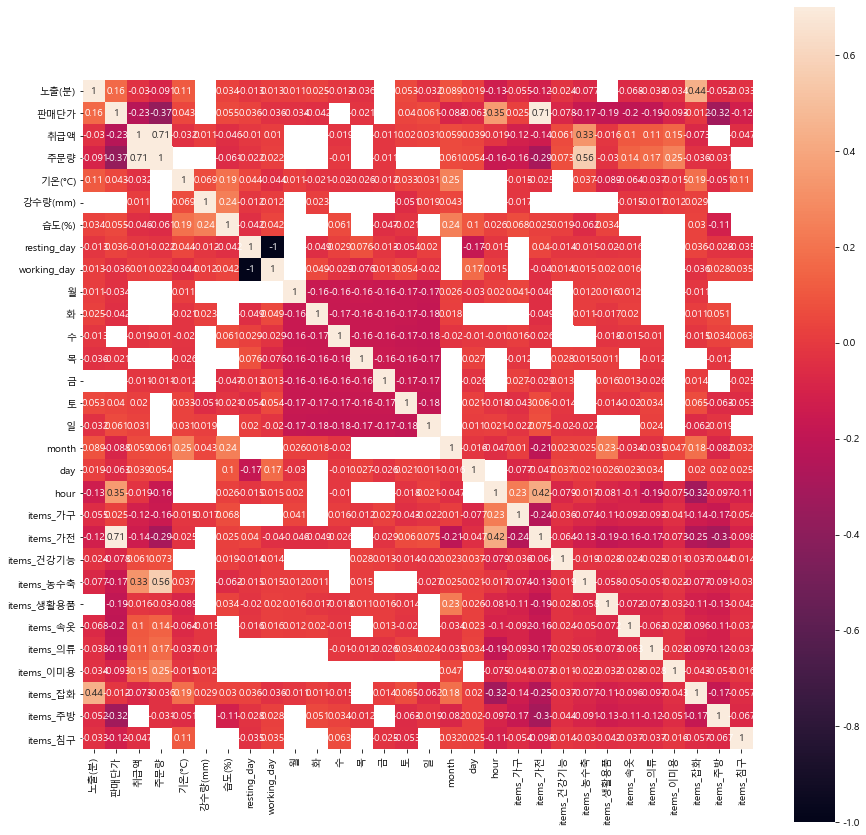

In [1013]:
df_new_corr = df_new.corr()
df_new_corr = df_new_corr[abs(df_new_corr) > 0.01]
mask = np.array(df_new_corr)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize = (15,15))
heat = sns.heatmap(df_new_corr,square = True, annot = True, vmax = 0.7)

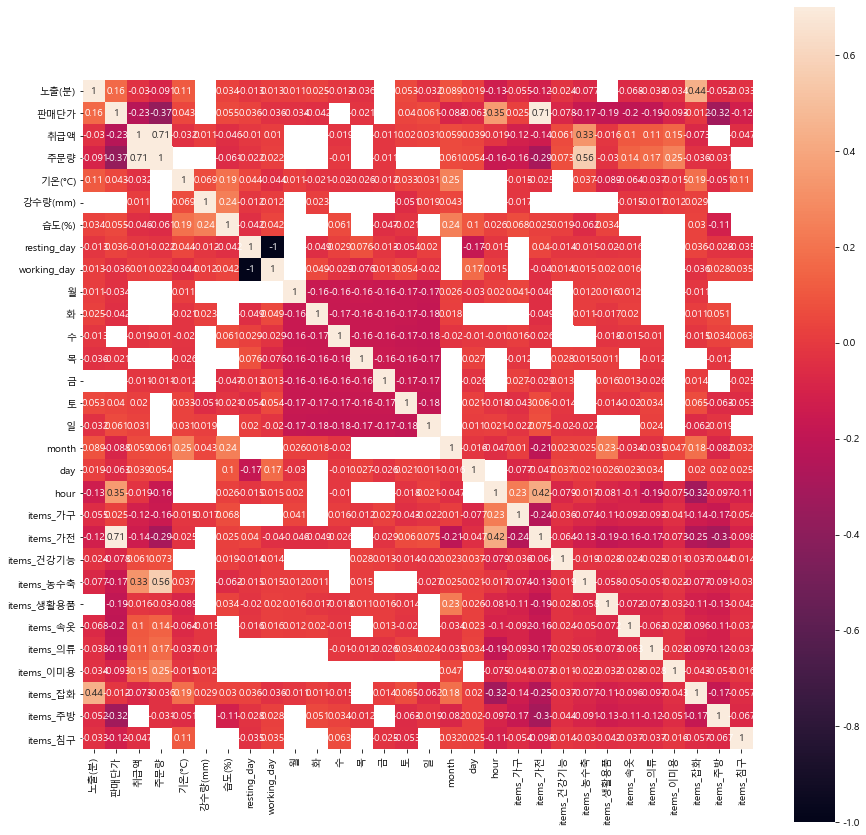

In [1014]:
Test_corr = Test.corr()
Test_corr = Test_corr[abs(Test_corr) > 0.01]
mask = np.array(Test_corr)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize = (15,15))
heat = sns.heatmap(df_new_corr,square = True, annot = True, vmax = 0.7)

In [1015]:
# checking = pd.read_excel('checking.xlsx')

In [1016]:
# checking.info()